<a href="https://colab.research.google.com/github/stenoe/BDOA/blob/main/Notebooks/BDOA_HDF5_Lecture_11_Homework_from_lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open HDF5 files with Python Sample Code

https://www.neonscience.org/resources/learning-hub/tutorials/hdf5-intro-python

#### Objectives

At the end of this tutorial you will be able to

* open an HDF5 file with Python.

## Data to Download

DOWNLOAD NEON TEACHING DATA SUBSET: IMAGING SPECTROMETER DATA - HDF5

These hyperspectral remote sensing data provide information on the National Ecological Observatory Network's San Joaquin Exerimental Range field site. The data were collected over the San Joaquin field site located in California (Domain 17) and processed at NEON headquarters. The entire dataset can be accessed by request from the NEON Data Portal.

#### Set working directory

After downloading these datasets, ensure to save them to one folder to simplify importing them later. Let's set your working directory to ensure it is correct.

In [ ]:
# import required libraries
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read H5 file
#f = h5.File("NEONDSImagingSpectrometerData.h5", "r")
f = h5.File("NEONDSImagingSpectrometerData.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
  print(n)

Reflectance
fwhm
map info
spatialInfo
wavelength


In [ ]:
# extract reflectance data from the H5 file
reflectance = f['Reflectance']
# extract one pixel from the data
reflectanceData = reflectance[:,49,392]
reflectanceData = reflectanceData.astype(float)

# divide the data by the scale factor to convert the integer values into floating point values
# note: this information would be accessed from the metadata
scaleFactor = 10000.0
reflectanceData /= scaleFactor
wavelength = f['wavelength']
wavelengthData = wavelength[:]
#transpose the data so wavelength values are in one column
wavelengthData = np.reshape(wavelengthData, 426)
   
# Print the attributes (metadata):
print("Data Description : ", reflectance.attrs['Description'])
print("Data dimensions : ", reflectance.shape, reflectance.attrs['DIMENSION_LABELS'])

# print a list of attributes in the H5 file
for n in reflectance.attrs:
	print(n)
	# close the h5 file
	f.close()

Data Description :  b'Atmospherically corrected reflectance.'
Data dimensions :  (426, 502, 477) ['Wavelength' 'Line' 'Sample']
DIMENSION_LABELS
Description
Scale Factor
Unit
data ignore value
row_col_band


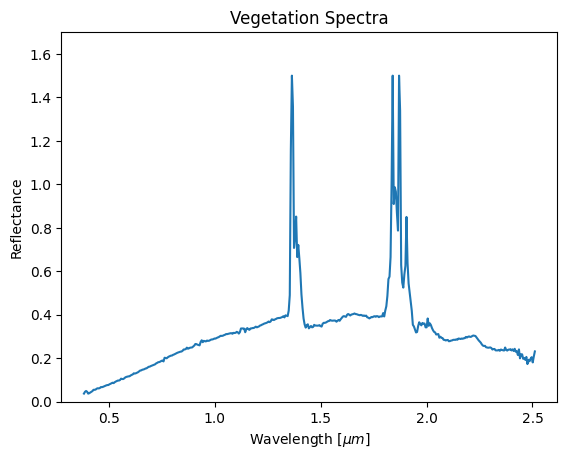

In [ ]:
# Plot
plt.plot(wavelengthData, reflectanceData)
plt.title("Vegetation Spectra")
plt.ylabel('Reflectance')
plt.ylim((0,1.7))
plt.xlabel('Wavelength [$\mu m$]')
plt.show()

You can use Latex symbols in your Google Colab and python graphs.

To use it you should use the dollar symbol: `$\alpha, \beta, \gamma, \mu$`

$\alpha, \beta, \gamma, \mu$

In [ ]:

# Write a new HDF file containing this spectrum
f = h5.File("VegetationSpectra.h5", "w")
rdata = f.create_dataset("VegetationSpectra", data=reflectanceData)
attrs = rdata.attrs
attrs.create("Wavelengths", data=wavelengthData)
f.close()

### Using the get command

In [ ]:
with h5.File('NEONDSImagingSpectrometerData.h5') as hdf:
  ls = list(hdf.keys())
  print(ls)
  data = hdf.get('Reflectance')
  dataset = np.array(data)
  print(dataset.shape)

['Reflectance', 'fwhm', 'map info', 'spatialInfo', 'wavelength']
(426, 502, 477)
